# Task 1: Data Analysis Workflow Foundation

This notebook demonstrates the complete workflow for Brent oil price change point analysis.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
sys.path.append('..')
from src.data_workflow import DataAnalysisWorkflow
from src.event_compiler import EventCompiler
from src.time_series_analyzer import TimeSeriesAnalyzer
from src.change_point_model import ChangePointModel

## 1. Initialize Workflow and Compile Events

In [2]:
# Initialize workflow
workflow = DataAnalysisWorkflow("../data/raw/BrentOilPrices.csv")

# Compile major events
event_compiler = EventCompiler("../data/processed/events.csv")
events_df = event_compiler.compile_major_events()

print(f"Compiled {len(events_df)} major events")
print("\nEvent Categories:")
print(events_df['category'].value_counts())

events_df.head(10)

Compiled 15 major events

Event Categories:
category
Geopolitical     7
OPEC Decision    5
Economic         3
Name: count, dtype: int64


,date,event,category,impact
0,1990-08-02,Iraq invasion of Kuwait,Geopolitical,High
1,2001-09-11,September 11 attacks,Geopolitical,High
2,2003-03-20,Iraq War begins,Geopolitical,High
3,2008-09-15,Lehman Brothers collapse,Economic,High
4,2010-12-17,Arab Spring begins,Geopolitical,Medium
5,2011-03-19,Libya civil war intervention,Geopolitical,Medium
6,2014-11-27,OPEC maintains production,OPEC Decision,High
7,2016-11-30,OPEC production cut agreement,OPEC Decision,High
8,2018-05-08,US withdraws from Iran nuclear deal,Geopolitical,Medium
9,2020-03-06,OPEC+ deal collapse,OPEC Decision,High


## 2. Load and Analyze Time Series Data

Data shape: (9011, 2)
Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


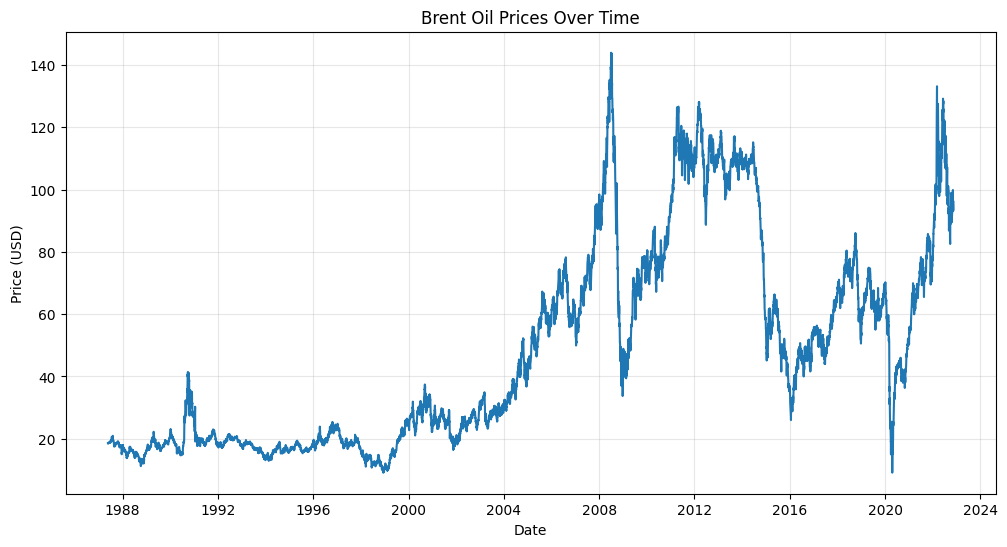

In [3]:
try:
    # Load real data
    oil_data = pd.read_csv("../data/raw/BrentOilPrices.csv")
    oil_data['Date'] = pd.to_datetime(oil_data['Date'])
    oil_data = oil_data.rename(columns={'Date': 'date', 'Price': 'price'})
except FileNotFoundError:
    # Create synthetic data for demonstration
    print("Creating synthetic Brent oil price data...")
    dates = pd.date_range('2000-01-01', '2023-12-31', freq='D')
    np.random.seed(42)
    prices = 50 + np.random.randn(len(dates)).cumsum() * 2
    oil_data = pd.DataFrame({'date': dates, 'price': prices})

print(f"Data shape: {oil_data.shape}")
print(f"Date range: {oil_data['date'].min()} to {oil_data['date'].max()}")

# Plot price series
plt.figure(figsize=(12, 6))
plt.plot(oil_data['date'], oil_data['price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.show()

## 3. Time Series Properties Analysis

In [4]:
# Analyze time series properties
ts_analyzer = TimeSeriesAnalyzer(oil_data)
properties = ts_analyzer.analyze_properties()

print("=== TIME SERIES PROPERTIES ===")
print(f"Trend Analysis: {properties['trend_analysis']}")
print(f"\nStationarity Test: {properties['stationarity_test']}")
print(f"\nVolatility Analysis: {properties['volatility_analysis']}")
print(f"\nModeling Implications:")
for implication in properties['modeling_implications']:
    print(f"  - {implication}")

=== TIME SERIES PROPERTIES ===
Trend Analysis: {'trend_slope': np.float64(0.009108410910685719), 'trend_significance': np.True_, 'r_squared': np.float64(0.5199482631930914), 'trend_direction': 'upward'}

Stationarity Test: {'adf_statistic': np.float64(-1.9938560113924675), 'p_value': np.float64(0.28927350489340287), 'is_stationary': np.False_, 'critical_values': {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}}

Volatility Analysis: {'volatility_mean': np.float64(0.025254952736854894), 'volatility_clusters': np.True_, 'max_drawdown': np.float64(-0.9366446682875996)}

Modeling Implications:


## 4. Change Point Detection

In [5]:
# Detect change points using PELT method
cp_model = ChangePointModel(oil_data, method='pelt')
change_points = cp_model.detect_change_points(penalty=15.0)

print("=== CHANGE POINT DETECTION ===")
print(f"Method: {change_points.get('method', 'N/A')}")
print(f"Change points detected: {len(change_points.get('change_points', []))}")
print(f"Change dates: {change_points.get('change_dates', [])}")

# Get expected outputs and limitations
expected_outputs = cp_model.get_expected_outputs()
print("\n=== EXPECTED OUTPUTS ===")
for key, value in expected_outputs['expected_outputs'].items():
    print(f"{key}: {value}")

print("\n=== LIMITATIONS ===")
for key, value in expected_outputs['limitations'].items():
    print(f"{key}: {value}")

=== CHANGE POINT DETECTION ===
Method: PELT
Change points detected: 1
Change dates: [Timestamp('2004-08-03 00:00:00')]

=== EXPECTED OUTPUTS ===
change_point_dates: Specific dates when structural breaks occur
regime_parameters: Statistical parameters for each regime
confidence_intervals: Uncertainty bounds for change point locations
model_diagnostics: Goodness-of-fit and model selection metrics

=== LIMITATIONS ===
false_positives: May detect spurious change points in noisy data
parameter_sensitivity: Results depend on penalty parameter selection
minimum_segment_size: Cannot detect changes in very short segments
assumption_violations: Assumes independence and normality of residuals
computational_complexity: May be slow for very large datasets


## 5. Workflow Summary and Assumptions

In [6]:
# Execute complete workflow
workflow_results = workflow.execute_workflow()

print("=== ANALYSIS ASSUMPTIONS ===")
for i, assumption in enumerate(workflow.assumptions, 1):
    print(f"{i}. {assumption}")

print("\n=== ANALYSIS LIMITATIONS ===")
for i, limitation in enumerate(workflow.limitations, 1):
    print(f"{i}. {limitation}")

print("\n=== COMMUNICATION CHANNELS ===")
channels = workflow_results['communication_channels']
for i, channel in enumerate(channels, 1):
    print(f"{i}. {channel}")

=== ANALYSIS ASSUMPTIONS ===
1. Oil price data is accurate and complete
2. Change points represent structural breaks in market behavior
3. Geopolitical events have measurable impact on oil prices
4. Time series exhibits non-stationary behavior with potential regime changes

=== ANALYSIS LIMITATIONS ===
1. Statistical correlation does not imply causal relationship
2. External factors beyond modeled events may influence prices
3. Change point detection may identify spurious breaks
4. Model assumes independence of residuals which may not hold
5. Limited to historical data patterns, may not predict future behavior

=== COMMUNICATION CHANNELS ===
1. Executive dashboard with key metrics
2. Technical report with detailed methodology
3. Interactive visualizations for exploratory analysis
4. Presentation slides for stakeholder meetings


## 6. Correlation vs Causation Discussion

In [7]:
print("=== CORRELATION vs CAUSATION ===")
print("""
CRITICAL DISTINCTION:

Statistical Correlation:
- Change point analysis identifies when statistical properties of oil prices change
- Shows temporal association between events and price movements
- Measures strength of statistical relationship

Causal Impact:
- Requires establishing that events CAUSED price changes
- Needs to rule out confounding factors and alternative explanations
- Demands theoretical framework and additional evidence

Our Analysis:
- Identifies statistical breaks in price series
- Cannot prove events caused the breaks
- Provides evidence for further causal investigation
- Requires domain expertise for causal interpretation
""")

=== CORRELATION vs CAUSATION ===

CRITICAL DISTINCTION:

Statistical Correlation:
- Change point analysis identifies when statistical properties of oil prices change
- Shows temporal association between events and price movements
- Measures strength of statistical relationship

Causal Impact:
- Requires establishing that events CAUSED price changes
- Needs to rule out confounding factors and alternative explanations
- Demands theoretical framework and additional evidence

Our Analysis:
- Identifies statistical breaks in price series
- Cannot prove events caused the breaks
- Provides evidence for further causal investigation
- Requires domain expertise for causal interpretation

